In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [10]:
x = faces.data
y = faces.target
target_names = faces.target_names

In [12]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [11]:
pd.Series(y).value_counts()

3    530
1    236
5    144
2    121
4    109
0     77
dtype: int64

In [35]:
x.shape               # 1850 = 50 x 37    # colums이 1850개인 고차원 데이터

(1217, 1850)

In [36]:
x[0].reshape(50, 37)

array([[ 57.      ,  60.333332,  73.333336, ..., 115.333336,  90.      ,
         66.333336],
       [ 64.333336,  69.666664,  81.333336, ..., 130.33333 ,  95.333336,
         72.666664],
       [ 82.333336,  85.666664,  94.333336, ..., 136.33333 , 103.      ,
         79.      ],
       ...,
       [125.      , 126.333336, 128.      , ...,  17.      ,  16.333334,
         17.      ],
       [146.33333 , 132.      , 125.333336, ...,  19.      ,  18.333334,
         18.      ],
       [218.      , 173.      , 130.33333 , ...,  20.333334,  22.      ,
         20.333334]], dtype=float32)

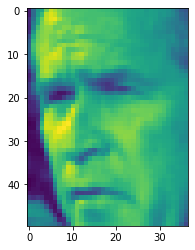

In [37]:
plt.imshow(x[30].reshape(50, 37))

In [38]:
n_samples, h, w = x.reshape(1217, 50, 37).shape  # 이미지수(데이터수), row 수, column 수

In [39]:
samples = x[:10].reshape(10, h, w)
samples

array([[[ 57.      ,  60.333332,  73.333336, ..., 115.333336,
          90.      ,  66.333336],
        [ 64.333336,  69.666664,  81.333336, ..., 130.33333 ,
          95.333336,  72.666664],
        [ 82.333336,  85.666664,  94.333336, ..., 136.33333 ,
         103.      ,  79.      ],
        ...,
        [125.      , 126.333336, 128.      , ...,  17.      ,
          16.333334,  17.      ],
        [146.33333 , 132.      , 125.333336, ...,  19.      ,
          18.333334,  18.      ],
        [218.      , 173.      , 130.33333 , ...,  20.333334,
          22.      ,  20.333334]],

       [[ 11.      ,  13.333333,  15.666667, ..., 197.33333 ,
         194.      , 197.66667 ],
        [ 12.666667,  14.      ,  17.666666, ..., 192.66667 ,
         186.66667 , 188.66667 ],
        [ 13.333333,  13.      ,  20.      , ..., 193.      ,
         190.66667 , 185.66667 ],
        ...,
        [ 64.333336,  68.666664,  64.      , ..., 115.      ,
         123.666664, 126.666664],
        [ 61

In [40]:
samples.shape

(10, 50, 37)

In [44]:
fig, axes = plt.subplots(nrows = 2, cols = 5, figsize = (20, 10))

TypeError: __init__() got an unexpected keyword argument 'cols'

In [42]:
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap = 'gray')

NameError: name 'axes' is not defined

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111, test_size=0.2)


In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
rfc.score(x_test_scaled, y_test)

0.6024590163934426

In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_scaled, y_train)
svc.score(x_test_scaled, y_test)

0.7418032786885246

In [55]:
# PCA Decomposition

In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_scaled)

PCA()

In [58]:
pca.n_components_

973

In [62]:
pca = PCA(n_components=0.9)
pca.fit(x_train_scaled)

PCA(n_components=0.9)

In [63]:
pca.n_components_

73

In [64]:
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled_pca, y_train)
rfc.score(x_test_scaled_pca, y_test)

0.610655737704918

In [66]:
pca.components_.shape

(73, 1850)

In [68]:
eigenfaces = pca.components_.reshape((pca.n_components, h, w))
smaples = eigenfaces[:10].reshape(10, h, w)

TypeError: 'float' object cannot be interpreted as an integer